# T-Test

Let's look at the "Bike Sharing Dataset" from Kaggle.
* https://www.kaggle.com/lakshmi25npathi/bike-sharing-dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Let's see whether the mean value of bike rentals ('cnt') is different for whether it is a holiday or not.

In [5]:
df.groupby('holiday')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,710.0,4527.104225,1929.013947,22.0,3214.0,4558.0,5932.75,8714.0
1,21.0,3735.000000,2103.350660,1000.0,1951.0,3351.0,6034.00,7403.0


<AxesSubplot:title={'center':'cnt'}, xlabel='holiday'>

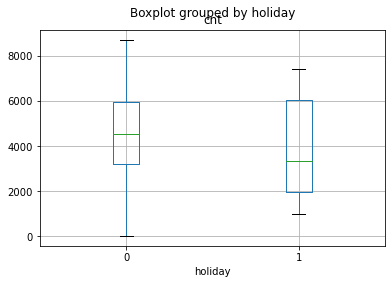

In [6]:
df.boxplot(column=['cnt'], by='holiday')

In [7]:
sample_yes = df[(df['holiday'] == 1)]
sample_no = df[(df['holiday'] == 0)]

In [8]:
print(sample_yes.shape)
print(sample_no.shape)

(21, 16)
(710, 16)


Hm.... we could do this, but to do the t-test, we'd need the sample sizes to be the same, and only choosing 21 of 710 values seems somewhat dicey.

In [9]:
df.groupby('weathersit')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
weathersit,,,,,,,,
1,463.0,4876.786177,1879.483989,431.0,3636.5,4844.0,6458.5,8714.0
2,247.0,4035.862348,1809.109918,605.0,2674.5,4040.0,5257.5,8362.0
3,21.0,1803.285714,1240.284449,22.0,705.0,1817.0,2424.0,4639.0


This has three values, so we'd need to do multivariate analysis.... let's come back to this.

In [10]:
df.groupby('workingday')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,231.0,4330.168831,2052.141245,605.0,2710.50,4459.0,5907.5,8714.0
1,500.0,4584.820000,1878.415583,22.0,3344.25,4582.0,5987.5,8362.0


That's kinda better.... 231 values for non-working-day.

<AxesSubplot:title={'center':'cnt'}, xlabel='workingday'>

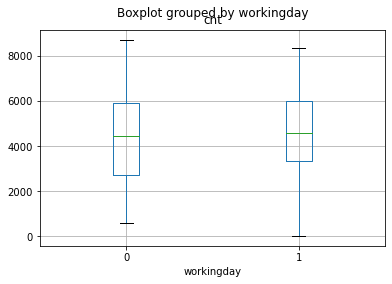

In [11]:
df.boxplot(column=['cnt'], by='workingday')

In [12]:
sample_yes = df[(df['workingday'] == 1)]
sample_no = df[(df['workingday'] == 0)]

In [13]:
print(sample_yes.shape)
print(sample_no.shape)

(500, 16)
(231, 16)


In [14]:
sample_yes = sample_yes.sample(231)

In [15]:
print(sample_yes.shape)
print(sample_no.shape)

(231, 16)
(231, 16)


We then need to test that the samples have the same variance.  We can do this with Levene's test.

In [16]:
from scipy import stats

In [17]:
stats.levene(sample_yes['cnt'], sample_no['cnt'])

LeveneResult(statistic=3.7019512970567257, pvalue=0.05496551856133269)

p-value is above 5%, so we assume that we can accept the null hypothesis -- the variances are the same.

Another assumption for independent t-test: the distribution of the residuals between the two groups is a normal distribution.

In [ ]:
from sklearn.preprocessing import scale
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
diff_res = scale(np.array(sample_yes['cnt']) - np.array(sample_no['cnt']))

In [ ]:
plt.hist(diff_res)

Looks normal, so that is good.

We can be even more specific about testing for a normal distribution by making the QQ plot.  This is available in the stats module as a 'probplot'.

In [ ]:
stats.probplot(diff_res, plot=plt, dist='norm');

Looks good.

Even one more test to confirm:  the Shapiro-Wilks test for normality. (If test is not significant, then the sample is normally distributed).

In [ ]:
stats.shapiro(diff_res)

p-value is high, so sample is normally distributed.

Finally get to the t-test:

In [ ]:
stats.ttest_ind(sample_yes['cnt'], sample_no['cnt'])

Lo and behold, the p-value is high so we have to accept the null hypothesis.  The means are not statistically different.

Let's check for temperature:

In [ ]:
df.groupby('temp')['cnt'].describe()

Let's look at hot vs cold days:

In [ ]:
df['hot'] = df['temp'] > df['temp'].mean()

In [ ]:
df.groupby('hot')['cnt'].describe()

In [ ]:
df.boxplot(column=['cnt'], by='hot')

In [ ]:
sample_yes = df[(df['hot'] == 1)]
sample_no = df[(df['hot'] == 0)]

In [ ]:
print(sample_yes.shape)
print(sample_no.shape)

In [ ]:
sample_yes = sample_yes.sample(364)

In [ ]:
print(sample_yes.shape)
print(sample_no.shape)

We then need to test that the samples have the same variance.  We can do this with Levene's test.

In [ ]:
stats.levene(sample_yes['cnt'], sample_no['cnt'])

p-value is below 5%..... we must proceed cautiously.

Another assumption for independent t-test: the distribution of the residuals between the two groups is a normal distribution.

In [ ]:
diff_res = scale(np.array(sample_yes['cnt']) - np.array(sample_no['cnt']))

In [ ]:
plt.hist(diff_res)

Looks more or less normal, so that is good.

We can be even more specific about testing for a normal distribution by making the QQ plot.  This is available in the stats module as a 'probplot'.

In [ ]:
stats.probplot(diff_res, plot=plt, dist='norm');

Looks good.

Even one more test to confirm:  the Shapiro-Wilks test for normality. (If test is not significant, then the sample is normally distributed).

In [ ]:
stats.shapiro(diff_res)

p-value is low, so again sample is not quite normally distributed.

Let's still try the t-test:

In [ ]:
stats.ttest_ind(sample_yes['cnt'], sample_no['cnt'])

Very low p-value, which would indicate a significant difference.

We can use another Python library [researchpy](https://researchpy.readthedocs.io/en/latest/ttest_documentation.html) to do a test for when the residuals aren't normally distributed: Welch's t-test.

In [ ]:
import researchpy as rp

In [ ]:
# note the equal_variances = False
descriptives, results = rp.ttest(sample_yes['cnt'], 
                                 sample_no['cnt'], 
                                 equal_variances=False)

In [ ]:
descriptives

In [ ]:
print(results)

Here the p-value is low and we've done the proper t-test for when the two variances are not equal.

Let's go back to look at the weather.  From the Kaggle site, it notes:
* weathersit
  1. Clear, Few clouds, Partly cloudy, Partly cloudy
  2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [ ]:
df.groupby('weathersit')['cnt'].describe()

In [ ]:
df.boxplot(column=['cnt'], by='weathersit')

Here we can use ANOVA, to cover all three at once.

In [ ]:
stats.f_oneway(df.loc[df['weathersit'] == 1,['cnt']],
               df.loc[df['weathersit'] == 2,['cnt']],
               df.loc[df['weathersit'] == 3,['cnt']])

Teeny tiny p-value.  The means are definitely not the same between the three groups.

Another option (with a LOT more output info) is to use the statsmodels library.  See here for their [ANOVA](https://www.statsmodels.org/stable/examples/notebooks/generated/interactions_anova.html).

In [ ]:
from statsmodels.formula.api import ols

In [ ]:
result = ols('cnt ~ C(weathersit)', data = df).fit()

In [ ]:
result.summary()

The above was for the One-Way ANOVA.  Let's explore the Two-Way ANOVA.

We need that, for example, when looking at both 'weathersit' and 'hot'.

In [ ]:
model = ols('cnt ~ C(hot)', df).fit()

In [ ]:
model.summary()

In [ ]:
model = ols('cnt ~ C(hot) + C(weathersit)', df).fit()

In [ ]:
model.summary()

and we can use the statsmodels api to assess the anova of each category:

In [ ]:
import statsmodels.api as sm

In [ ]:
sm.stats.anova_lm(model)

In [ ]:
model = ols('cnt ~ C(hot) * C(weathersit)', df).fit()

In [ ]:
model.summary()

In [ ]:
sm.stats.anova_lm(model)

Finally, let's look at the paired t-test.

Here we don't have paired data, but let's look at another dataset (from 'trangel' stats-with-python repo) with hypothetical before/after values of blood glucose readings for 40 people with diabetes.

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/trangel/stats-with-python/master/data/BG-db.csv")

In [ ]:
df

In [ ]:
df[['BG 1','BG 2']].hist()

In [ ]:
df[['BG 1','BG 2']].describe()

Relatively small difference in the mean.... is it significant?

In [ ]:
df[['BG 1','BG 2']].boxplot()

Check assumptions:
* samples are independent and random
* distribution of the residuals should be normal
* variances between the two groups are equal

In [ ]:
stats.levene(df['BG 1'], df['BG 2'])

Just above the 5%.  We assume the variances are equal.

In [ ]:
bg_diff = scale(np.array(df['BG 1']) - np.array(df['BG 2']))

In [ ]:
plt.hist(bg_diff)

In [ ]:
stats.probplot(bg_diff, plot=plt, dist='norm');

In [ ]:
stats.shapiro(bg_diff)

In [ ]:
stats.ttest_rel(df['BG 1'], df['BG 2'])

To satisfy our qualms about normality, let's us researchpy and say that the variances are not equal and that we are using paired values.  This leads to the Wilcoxon signed-rank test.

In [ ]:
rp.ttest(df['BG 1'], df['BG 2'], paired = True, equal_variances = False)